In [1]:
import os

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

%matplotlib inline 
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn import datasets

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [2]:
df = pd.read_csv('Supermarket Data.csv')

In [35]:
df.describe()

,SHOP_WEEK,SHOP_DATE,SHOP_WEEKDAY,SHOP_HOUR,QUANTITY,SPEND,BASKET_ID
count,956574.000000,9.565740e+05,956574.000000,956574.000000,956574.000000,956574.000000,9.565740e+05
mean,200702.251671,2.006970e+07,3.996021,14.950665,1.514577,1.871697,9.941059e+14
std,65.857803,7.160957e+03,1.997058,3.636119,1.621021,2.767820,3.332150e+09
min,200607.000000,2.006041e+07,1.000000,8.000000,1.000000,0.010000,9.941001e+14
25%,200637.000000,2.006111e+07,2.000000,12.000000,1.000000,0.750000,9.941031e+14
50%,200713.000000,2.007052e+07,4.000000,15.000000,1.000000,1.200000,9.941059e+14
75%,200742.000000,2.007121e+07,6.000000,18.000000,1.000000,2.060000,9.941088e+14
max,200819.000000,2.008071e+07,7.000000,21.000000,129.000000,476.160000,9.941117e+14


In [6]:
df[['CUST_CODE','CUST_LIFESTAGE','BASKET_DOMINANT_MISSION','STORE_FORMAT','STORE_REGION']]

,CUST_CODE,CUST_LIFESTAGE,BASKET_DOMINANT_MISSION,STORE_FORMAT,STORE_REGION
0,CUST0000583261,YF,Grocery,LS,E02
1,CUST0000537317,OF,Fresh,LS,E02
2,CUST0000472158,YF,Grocery,LS,E02
3,CUST0000099658,OF,Mixed,LS,E02
4,NaN,NaN,Fresh,LS,E02
...,...,...,...,...,...
956569,NaN,NaN,Fresh,LS,W01
956570,NaN,NaN,Fresh,LS,W01
956571,CUST0000544241,YA,Fresh,LS,W01
956572,CUST0000423155,YF,Fresh,LS,W01


In [36]:
df2 = df[['CUST_CODE','SHOP_HOUR','SHOP_WEEKDAY','QUANTITY','SPEND','BASKET_ID','BASKET_SIZE']]

In [37]:
#count customer
df2['CUST_CODE'].count()

802892

In [33]:
#Filter Member
df_combine = pd.read_csv('combine_data.csv')
print(df_combine['CUST_CODE'].count())
print(df_combine['CUST_CODE'].isnull().sum())

6100
0


In [12]:
df_combine.describe()

,TOTAL_SPEND,TOTAL_VISIT,STD_TICKET_SIZE,DURING_SINCE_FIRST_PURCHASE,DURING_SINCE_LAST_PURCHASE,LENGHT_OF_STAY,AVERAGE_TIME_TO_EVENT,MODE_BASKET_SIZE,MODE_SHOP_TIME,MODE_WEEKDAY,AVERAGE_MONTHLY_VISIT,AVERAGE_MONTHLY_SPEND,STD_MONTHLY_SPEND,STD_MONTHLY_VISIT
count,6100.000000,6100.000000,6100.000000,6100.000000,6100.000000,6100.000000,6100.000000,6100.000000,6100.000000,6100.000000,6100.000000,6100.000000,6100.000000,6100.000000
mean,246.038310,20.029180,1.473593,573.686230,243.070000,330.616230,46.170605,2.057049,2.167705,3.973443,9.646235,18.377850,8.656590,4.169706
std,704.599006,51.230247,1.850203,215.803423,247.437688,321.741491,68.231067,0.815306,0.698937,2.005228,14.236267,29.017284,14.976697,7.012247
min,0.010000,1.000000,0.000000,91.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.010000,0.000000,0.000000
25%,3.627500,1.000000,0.320000,396.000000,27.000000,0.000000,0.000000,1.000000,2.000000,2.000000,1.750000,2.220000,0.000000,0.000000
50%,19.145000,3.000000,1.136973,641.000000,139.000000,262.500000,15.476842,2.000000,2.000000,4.000000,4.000000,7.718929,1.184113,0.500000
75%,112.637500,11.000000,1.994921,768.000000,422.000000,670.000000,65.517857,3.000000,3.000000,6.000000,11.500000,22.087500,11.580436,5.656854
max,14998.110000,666.000000,32.007816,818.000000,818.000000,818.000000,402.500000,3.000000,3.000000,7.000000,129.750000,535.646786,156.524906,57.207216


In [13]:
df_combine

,CUST_CODE,TOTAL_SPEND,TOTAL_VISIT,STD_TICKET_SIZE,DURING_SINCE_FIRST_PURCHASE,DURING_SINCE_LAST_PURCHASE,LENGHT_OF_STAY,AVERAGE_TIME_TO_EVENT,MODE_BASKET_SIZE,MODE_SHOP_TIME,MODE_WEEKDAY,AVERAGE_MONTHLY_VISIT,AVERAGE_MONTHLY_SPEND,STD_MONTHLY_SPEND,STD_MONTHLY_VISIT
0,CUST0000125708,910.55,117,2.333555,816,3,813,6.948718,3,3,2,19.148148,33.724074,19.074771,10.280163
1,CUST0000708150,142.83,34,1.638586,584,22,562,16.529412,2,3,5,11.000000,15.870000,10.913139,7.055337
2,CUST0000978405,2094.86,151,1.661519,816,3,813,5.384106,3,3,2,44.178571,74.816429,58.939975,36.620694
3,CUST0000109773,1355.11,55,2.250789,667,0,667,12.127273,3,3,6,36.263158,71.321579,47.305724,22.853866
4,CUST0000361582,531.93,33,0.898602,281,32,249,7.545455,3,3,2,44.700000,53.193000,28.903252,25.306323
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6095,CUST0000040844,112.85,22,0.939787,815,9,806,36.636364,2,1,7,12.500000,14.106250,9.970681,9.205976
6096,CUST0000863414,268.10,22,1.937037,744,82,662,30.090909,3,3,4,9.125000,16.756250,16.587149,8.107674
6097,CUST0000866895,49.66,22,1.118008,400,33,367,16.681818,2,3,6,5.000000,6.207500,7.141428,5.338539
6098,CUST0000798581,232.68,22,3.357500,752,29,723,32.863636,2,2,7,6.153846,17.898462,17.462066,4.638404


In [39]:
df_combine_data = df_combine[[ 'TOTAL_VISIT', 'STD_TICKET_SIZE',
       'DURING_SINCE_FIRST_PURCHASE', 'DURING_SINCE_LAST_PURCHASE',
       'LENGHT_OF_STAY', 'AVERAGE_TIME_TO_EVENT', 'MODE_BASKET_SIZE',
       'MODE_SHOP_TIME', 'MODE_WEEKDAY', 'AVERAGE_MONTHLY_VISIT',
       'AVERAGE_MONTHLY_SPEND', 'STD_MONTHLY_SPEND', 'STD_MONTHLY_VISIT']]

In [40]:
df_combine_data.head(20)

,TOTAL_VISIT,STD_TICKET_SIZE,DURING_SINCE_FIRST_PURCHASE,DURING_SINCE_LAST_PURCHASE,LENGHT_OF_STAY,AVERAGE_TIME_TO_EVENT,MODE_BASKET_SIZE,MODE_SHOP_TIME,MODE_WEEKDAY,AVERAGE_MONTHLY_VISIT,AVERAGE_MONTHLY_SPEND,STD_MONTHLY_SPEND,STD_MONTHLY_VISIT
0,117,2.333555,816,3,813,6.948718,3,3,2,19.148148,33.724074,19.074771,10.280163
1,34,1.638586,584,22,562,16.529412,2,3,5,11.000000,15.870000,10.913139,7.055337
2,151,1.661519,816,3,813,5.384106,3,3,2,44.178571,74.816429,58.939975,36.620694
3,55,2.250789,667,0,667,12.127273,3,3,6,36.263158,71.321579,47.305724,22.853866
4,33,0.898602,281,32,249,7.545455,3,3,2,44.700000,53.193000,28.903252,25.306323
5,308,3.410482,818,1,817,2.652597,3,2,5,73.357143,114.276786,43.462072,17.433986
6,26,2.746535,808,25,783,30.115385,2,2,4,5.222222,16.271111,7.130855,2.484520
7,292,1.283374,814,2,812,2.780822,3,2,2,113.035714,163.771429,42.786863,28.563816
8,69,2.287239,804,2,802,11.623188,2,2,5,10.909091,20.541818,15.322938,8.474073
9,103,2.327013,806,16,790,7.669903,3,3,6,44.370370,92.364074,50.744659,22.296235


In [34]:
len_columns = len(list(df_combine_data.columns))
print(range(0,len_columns))
list(range(0,len_columns))

range(0, 13)


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

In [19]:
def drawSSEPlot(df, column_indices, n_clusters=8, max_iter=300, tol=1e-04, init='k-means++', n_init=10, algorithm='auto'):
    import matplotlib.pyplot as plt
    inertia_values = []
    for i in range(1, n_clusters+1):
        km = KMeans(n_clusters=i, max_iter=max_iter, tol=tol, init=init, n_init=n_init, random_state=1, algorithm=algorithm)
        km.fit_predict(df.iloc[:, column_indices])
        inertia_values.append(km.inertia_)
    fig, ax = plt.subplots(figsize=(8, 6))
    plt.plot(range(1, n_clusters+1), inertia_values, color='red')
    plt.xlabel('No. of Clusters', fontsize=15)
    plt.ylabel('SSE / Inertia', fontsize=15)
    plt.title('SSE / Inertia vs No. Of Clusters', fontsize=15)
    plt.grid()
    plt.show()

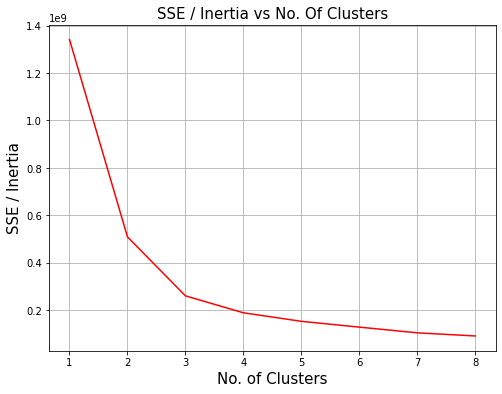

In [20]:
drawSSEPlot(df_combine_data, list(range(0,len_columns)))

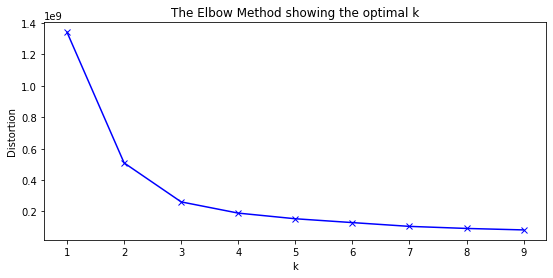

In [21]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df_combine_data[df_combine_data.columns])
    distortions.append(kmeanModel.inertia_)
plt.figure(figsize=(9,4))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [22]:
distortions = []
K = range(2,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    y_predict = kmeanModel.fit_predict(df_combine_data)
    centroids  = kmeanModel.cluster_centers_
    silhouette_vals = silhouette_samples(df_combine_data,y_predict)
    print('cluster:',k,'Average Silhouette:', sum(silhouette_vals)/len(silhouette_vals))

cluster: 2 Average Silhouette: 0.5528242843931898
cluster: 3 Average Silhouette: 0.5687327378327278
cluster: 4 Average Silhouette: 0.5043314988335796
cluster: 5 Average Silhouette: 0.4560183900724784
cluster: 6 Average Silhouette: 0.4368311521831929
cluster: 7 Average Silhouette: 0.44284840294565225
cluster: 8 Average Silhouette: 0.42483978183982823
cluster: 9 Average Silhouette: 0.40573921544340563


In [23]:
df_k3 = pd.read_csv('no_spend.csv')

In [24]:
df_k3.head(10)

,CENTROID_ID,CUST_CODE,TOTAL_SPEND,TOTAL_VISIT,STD_TICKET_SIZE,DURING_SINCE_FIRST_PURCHASE,DURING_SINCE_LAST_PURCHASE,LENGHT_OF_STAY,AVERAGE_TIME_TO_EVENT,MODE_BASKET_SIZE,MODE_SHOP_TIME,MODE_WEEKDAY,AVERAGE_MONTHLY_VISIT,AVERAGE_MONTHLY_SPEND,STD_MONTHLY_SPEND,STD_MONTHLY_VISIT
0,2,CUST0000161376,3146.67,127,2.632437,816,10,806,6.346457,3,2,1,57.407407,116.543333,58.523039,25.575247
1,2,CUST0000037123,2564.38,210,1.415367,817,3,814,3.876190,3,1,2,68.357143,91.585000,41.263924,28.866954
2,1,CUST0000708150,142.83,34,1.638586,584,22,562,16.529412,2,3,5,11.000000,15.870000,10.913139,7.055337
3,1,CUST0000635118,1038.09,136,2.551961,812,3,809,5.948529,3,3,3,20.142857,37.074643,30.421303,12.472009
4,1,CUST0000203439,535.54,151,1.237576,813,2,811,5.370861,2,1,1,12.464286,19.126429,10.488947,6.472371
5,2,CUST0000130484,728.56,54,3.411279,810,16,794,14.703704,3,2,3,31.833333,60.713333,40.985728,20.107351
6,1,CUST0000169635,418.78,31,1.745115,801,47,754,24.322581,3,3,6,14.933333,27.918667,29.763242,15.549777
7,1,CUST0000990465,1344.54,91,1.556681,807,2,805,8.846154,3,2,7,28.214286,48.019286,22.574390,11.613899
8,1,CUST0000984281,615.57,45,1.856656,810,43,767,17.044444,3,3,5,15.850000,30.778500,29.387734,14.543985
9,1,CUST0000503093,1031.77,166,1.525045,805,5,800,4.819277,2,2,1,21.392857,36.848929,25.169186,12.350070


In [25]:
df_k3.columns

Index(['CENTROID_ID', 'CUST_CODE', 'TOTAL_SPEND', 'TOTAL_VISIT',
       'STD_TICKET_SIZE', 'DURING_SINCE_FIRST_PURCHASE',
       'DURING_SINCE_LAST_PURCHASE', 'LENGHT_OF_STAY', 'AVERAGE_TIME_TO_EVENT',
       'MODE_BASKET_SIZE', 'MODE_SHOP_TIME', 'MODE_WEEKDAY',
       'AVERAGE_MONTHLY_VISIT', 'AVERAGE_MONTHLY_SPEND', 'STD_MONTHLY_SPEND',
       'STD_MONTHLY_VISIT'],
      dtype='object')

In [26]:
X = df_k3[[  'TOTAL_VISIT',
       'STD_TICKET_SIZE', 'DURING_SINCE_FIRST_PURCHASE',
       'DURING_SINCE_LAST_PURCHASE', 'LENGHT_OF_STAY', 'AVERAGE_TIME_TO_EVENT',
       'MODE_BASKET_SIZE', 'MODE_SHOP_TIME', 'MODE_WEEKDAY',
       'AVERAGE_MONTHLY_VISIT', 'AVERAGE_MONTHLY_SPEND', 'STD_MONTHLY_SPEND',
       'STD_MONTHLY_VISIT']]
y = df_k3['CENTROID_ID']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12)

In [27]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)
rf_feature_importance = rf.feature_importances_
rf_feature_importance

array([0.00370229, 0.01825473, 0.00740561, 0.00684586, 0.66803781,
       0.02032188, 0.02264751, 0.00230167, 0.001943  , 0.04700903,
       0.09046953, 0.1023454 , 0.00871568])

In [28]:
X.columns

Index(['TOTAL_VISIT', 'STD_TICKET_SIZE', 'DURING_SINCE_FIRST_PURCHASE',
       'DURING_SINCE_LAST_PURCHASE', 'LENGHT_OF_STAY', 'AVERAGE_TIME_TO_EVENT',
       'MODE_BASKET_SIZE', 'MODE_SHOP_TIME', 'MODE_WEEKDAY',
       'AVERAGE_MONTHLY_VISIT', 'AVERAGE_MONTHLY_SPEND', 'STD_MONTHLY_SPEND',
       'STD_MONTHLY_VISIT'],
      dtype='object')

Text(0.5, 0, 'Random Forest Parameter')

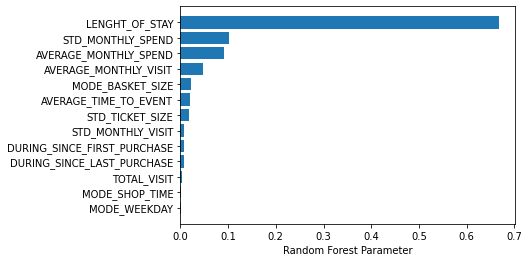

In [29]:
# plt.barh(X.columns, rf.feature_importances_)

sorted_idx = rf.feature_importances_.argsort()
plt.barh(X.columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Parameter")

**Interpretation**

จากการทำ Customer Segmentation โดยใช้ K-means model พบว่า การแบ่ง Cluster ที่เหมาะสมที่สุดสำหรับข้อมูลชุดนี้ คือ จำนวน Cluster K = 3 เพราะมีค่า Average Silhouette = 0.5687327378327278 ซึ่งมากที่สุด